In [41]:
import numpy as np
import math
from matplotlib import pyplot as plt, dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import time

import pymms.data
from pymms.data import util, edi, fpi, anc


Using energy distribution to get tracing input properties

In [66]:
import numpy as np
import math
from matplotlib import pyplot as plt, dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import time

import pymms.data
from pymms.data import util, edi, fpi, anc

'''
0. Setup. Get input paramters at time 't0'
'''
t0 = dt.datetime(2020, 6, 29, 0)
t1 = dt.datetime(2020, 6, 29, 12)

'''
1. Getting particle position using MMS spacecraft position
'''

# pull dataset
r_vname = '_'.join(('mms1', 'mec', 'r', 'gse'))
mec_data = util.load_data(sc='mms1', 
                        instr='mec', mode='srvy', 
                        level='l2', optdesc='epht89d', 
                        start_date=t0, 
                        end_date=t1, 
                        variables=r_vname)

# get mms position at t0  in [km/s] and convert to array
pos = mec_data['mms1_mec_r_gse'][0].to_numpy()

# convert to [m/s]
pos=pos*1e3

print(f"Initial position: {pos} m")

'''
2. Getting particle velocity using MMS1 FPI/DIS ion bulk-velocity vector in DBCS during specified survey
'''

# pull dataset
dis_data = fpi.load_moms(sc='mms1', mode='srvy', optdesc='dis-moms', start_date=t0, end_date=t1)

# get ion velocity vector in [km/s]
vel = dis_data['velocity'][0].to_numpy()

# convert to [m/s]
vel = vel*1e3
print(f"Initial velcoity: {vel} m/s")

Initial position: [-1.32524609e+08 -1.21099825e+08  1.19983069e+07] m
Initial velcoity: [22128.826   -9500.764    -558.14594] m/s


In [43]:
'''
1. Getting particle position using MMS spacecraft position
'''

# pull dataset
r_vname = '_'.join(('mms1', 'mec', 'r', 'gse'))
mec_data = util.load_data(sc='mms1', 
                        instr='mec', mode='srvy', 
                        level='l2', optdesc='epht89d', 
                        start_date=t0, 
                        end_date=t1, 
                        variables=r_vname)

# get mms position at t0  in [km/s] and convert to array
pos = mec_data['mms1_mec_r_gse'][0].to_numpy()

# convert to [m/s]
pos=pos*1e3

print(f"Initial position: {pos} m")



Initial position: [-1.32524609e+08 -1.21099825e+08  1.19983069e+07] m


In [44]:
'''
2. Getting particle velocity using MMS1 FPI/DIS ion bulk-velocity vector in DBCS during specified survey
'''

# pull dataset
dis_data = fpi.load_moms(sc='mms1', mode='srvy', optdesc='dis-moms', start_date=t0, end_date=t1)

# get ion velocity vector in [km/s]
vel = dis_data['velocity'][0].to_numpy()

# convert to [m/s]
vel = vel*1e3
print(f"Initial velcoity: {vel} m/s")

Initial velcoity: [22128.826   -9500.764    -558.14594] m/s


### Plots & Figures - ignore, WIP



In [64]:

def plot_2d(t, f, z, ax=None, cmap='nipy_spectral', label='', title='', xaxis=True):
    '''
    Plot a 2D heat map.
    
    Parameters
    ----------
    t : `numpy.datetime64`[N]
        Timestamps of the data
    f : `numpy.array`[M]
        Vector to be plotted
    z : `numpy.array`[N,M]
        Quantity to be plotted as a heat map.
    ax : `pyplot.axes`
        Axes in which to plot the heatmap. If not provided, a new figure and axes are created.
    cmap : str
        The colormap used to represent the heatmap
    label : str
        Label for the colorbar
    title : str
        Title for the plot
    xaxis : bool
        Put axis labels and tickmarks on the x-axis
    '''
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1)

    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)

    x0 = mdates.date2num(t)[:, np.newaxis].repeat(len(f), axis=1)
    x1 = f[np.newaxis, :].repeat(len(t), axis=0)

    im = ax.pcolorfast(x0, x1, z[0:-1, 0:-1], cmap=cmap)
    ax.images.append(im)
    ax.set_title(title)
    ax.set_ylabel('f (Hz)')
    ax.set_ylim(f[1], f[-1])
    ax.set_yscale('log')
    
    # t0 position
    
    xpos = dis_data['time'].data[300]
    ax.axvline(x = xpos, color = 'b', label = 'axvline - full height', zorder=20)
    

    if xaxis:
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')

    cbaxes = inset_axes(ax,
                        width='2%', height='100%', loc=4,
                        bbox_to_anchor=(0, 0, 1.05, 1),
                        bbox_transform=ax.transAxes,
                        borderpad=0)
    cb = plt.colorbar(im, cax=cbaxes, orientation='vertical')
    cb.set_label(label)

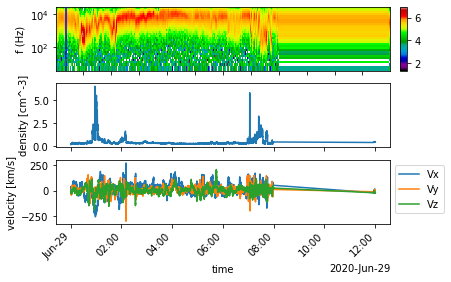

In [63]:
a = np.ma.log10(dis_data['omnispectr'].data)
 
fig, axes = plt.subplots(nrows=3, ncols=1, squeeze=False)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
 
ax = axes[0,0]
plot_2d(dis_data['time'].data, dis_data['energy'][0,:].data, a, ax=ax, xaxis=False)
 
ax = axes[1,0]
dis_data['density'].plot(ax=ax)
ax.set_title('')
ax.set_xticklabels([])
ax.set_xlabel('')
 
ax = axes[2,0]
dis_data['velocity'][:,0].plot(ax=ax, label='Vx')
dis_data['velocity'][:,1].plot(ax=ax, label='Vy')
dis_data['velocity'][:,2].plot(ax=ax, label='Vz')
ax.set_title('')
 
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
 
legend = ax.legend(loc="upper left", bbox_to_anchor=(1,1))
 
# plt.setp(axes, xlim=(t2, t3))
plt.show()

In [46]:
dis_data['time'].data[0]

numpy.datetime64('2020-06-29T00:00:05.850412872')